# load libraries

In [0]:
!pip install https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-2.2.0/pt_core_news_sm-2.2.0.tar.gz
!python -m spacy download pt_core_news_sm
!python -m spacy link pt_core_news_sm pt --force

In [0]:
#Libraries
import pandas as pd
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from spacy.lang.pt.examples import sentences
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.decomposition import PCA
import pickle
nlp = spacy.load('pt')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Mount drive

In [0]:
#Take Files From GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Paths  #Import FILES
DATASETS_FOLDER = '/content/drive/My Drive/Research/DataSets/'
# filename = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29.pkl'
#filename = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2018.pkl'  #Filtered >= 2018
#filename = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2016.pkl' 
#filename = DATASETS_FOLDER + 'DF_ReportsInColumnsLABEL_v20.01.29bte2019.pkl'  #Filtered >= 2019
#filename= DATASETS_FOLDER+'2016_DF_with_cleaned_stemmed_nonstemmed_v01.02.20.pkl'
filename= DATASETS_FOLDER+'2019_DF_cleaned_not_balanced.pkl'

In [0]:
df=pd.read_pickle(filename)

In [0]:
#Run Functions from another Jupyter Notebook
%run '/content/drive/My Drive/Fraud detection in internal auditing/Colab Notebooks/NLP functions_Gus.ipynb'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


below commented operations, already execcuted and the dataframe above has all cleaned version incorporated

In [0]:
# Show RISK Count
def plotStats(dfp):
  print("Original - Total: ", len(dfp), " HIGH: ", len(dfp[ (dfp['RISK'] == "HIGH") ]) , " Percentage: ", len(dfp[ (dfp['RISK'] == "HIGH") ])/len(dfp))

plotStats(df)

Original - Total:  181  HIGH:  30  Percentage:  0.16574585635359115


# To clean, preprocess, normaize 

In [0]:
corpus_token_cleaned_stem_version=[element for element in df['cleaned_stem_version'].tolist()]
corpus_token_cleaned_no_stem_version=[element for element in df['cleaned_no_stem_version'].tolist()]

## code for cleaning

In [0]:
# df['cleaned_stem_version'],df['cleaned_no_stem_version'] = normalize(df['ConstText'])
# df['sent_tokenized_corpus']= normalize1(df['ConstText']) 

# from nltk import word_tokenize
# stopword_list = stopwords.words('portuguese')

# df['sent_tokens'] = [word_tokenize(sen) for sen in df['sent_tokenized_corpus']]

# def remove_stop(token):
#   return [word for word in token if word not in stopword_list]

# filtered_word= [remove_stop(tokens) for tokens in df.sent_tokens]
# df['sent_token_final'] = [' '.join(sen) for sen in filtered_word]
# df['token_filtered'] = filtered_word

# def dummy_encoder(df):
#   df_dummies = pd.get_dummies(df['RISK'],prefix='Risk')
#   df = pd.concat([df,df_dummies],axis=1)
#   return df
  
# df = dummy_encoder(df)
# df['FinalLabel'] = df['RISK'].apply({'MEDIUM-LOW':1, 'HIGH':0}.get)

## to save the cleaned version to pickle file 
# filename = DATASETS_FOLDER + '2019_DF_cleaned_not_balanced.pkl'  #Filtered >= 2019
# df.to_pickle(filename)

# creating vectorizer and feature matrix

## creating 1 gram, bigram, trigram model, n gram models 

In [0]:
for i in range(1,4):
  #globals()['vectorizer_stemmed_{}'.format(i)],globals()['feature_matrix_stemmed_{}'.format(i)]= feature_engineering('tf_idf',corpus_token_cleaned_stem_version,1,1,i,i,dimension_reduction=False)
  globals()['vectorizer_stemmed_d{}'.format(i)],globals()['feature_matrix_stemmed_d{}'.format(i)]= feature_engineering('tf_idf',corpus_token_cleaned_stem_version,1,1,i,i,dimension_reduction=True,reduction_method='svd')

for i in range(1,4):
  #globals()['vectorizer_n_stememd_{}'.format(i)],globals()['feature_matrix_n_stemmed_{}'.format(i)]= feature_engineering('tf_idf',corpus_token_cleaned_no_stem_version,1,1,i,i,dimension_reduction=False)
  globals()['vectorizer_n_stememd_d{}'.format(i)],globals()['feature_matrix_n_stemmed_d{}'.format(i)]= feature_engineering('tf_idf',corpus_token_cleaned_no_stem_version,1,1,i,i,dimension_reduction=True,reduction_method='svd')

vectorized_n_stem_n_gram,feature_matrix_n_stemmed_n_gram = feature_engineering('tf_idf',corpus_token_cleaned_no_stem_version,1,1,1,3,dimension_reduction=True,reduction_method='svd')
vectorized_stem_n_gram,feature_matrix_stemmed_n_gram = feature_engineering('tf_idf',corpus_token_cleaned_stem_version,1,1,1,3,dimension_reduction=True,reduction_method='svd')

In [0]:
from sklearn.metrics import silhouette_score
for i in range(2,15):
    k_model,k_cluster= ml_unsupervised('kmeans_scikit',feature_matrix_n_stemmed_n_gram,numb_cluster=i)
    sil_coeff = silhouette_score(feature_matrix_n_stemmed_n_gram, k_cluster, metric='euclidean')
    print("cluster {} - score {}" .format(i,sil_coeff))

cluster 2 - score 0.16600859336164406
cluster 3 - score 0.16641394902330153
cluster 4 - score 0.16682388497492115
cluster 5 - score 0.16723847928962743
cluster 6 - score 0.16765781182507314
cluster 7 - score 0.16808196427471933
cluster 8 - score 0.16851102022089312
cluster 9 - score 0.16894506518969707
cluster 10 - score 0.16938418670784386
cluster 11 - score 0.16982847436149798
cluster 12 - score 0.17027801985720725
cluster 13 - score 0.17073291708500846
cluster 14 - score 0.17119326218380113


In [0]:
# scikit kmeans on stemmed_dimensionality reduced
kmean_obj_s_d_1,clusters_s_d_1 = ml_unsupervised('kmeans_scikit',feature_matrix_stemmed_d1,numb_cluster=2)
kmean_obj_s_d_2,clusters_s_d_2 = ml_unsupervised('kmeans_scikit',feature_matrix_stemmed_d2,numb_cluster=2)
kmean_obj_s_d_3,clusters_s_d_3 = ml_unsupervised('kmeans_scikit',feature_matrix_stemmed_d3,numb_cluster=2)

# scikit kmeans on non_stemmed_dimensionality reduced
kmean_obj_n_s_d_1,clusters_n_s_d_1 = ml_unsupervised('kmeans_scikit',feature_matrix_n_stemmed_d1,numb_cluster=2)
kmean_obj_n_s_d_2,clusters_n_s_d_2 = ml_unsupervised('kmeans_scikit',feature_matrix_n_stemmed_d2,numb_cluster=2)
kmean_obj_n_s_d_3,clusters_n_s_d_3 = ml_unsupervised('kmeans_scikit',feature_matrix_n_stemmed_d3,numb_cluster=2)

#nltk kmeans on stemmed dimensionality reduced
nltk_kmean_obj_s_d_1,nltk_clusters_s_d_1 = ml_unsupervised('kmeans_nltk',feature_matrix_stemmed_d1,numb_cluster=2)
nltk_kmean_obj_s_d_2,nltk_clusters_s_d_2 = ml_unsupervised('kmeans_nltk',feature_matrix_stemmed_d2,numb_cluster=2)
nltk_kmean_obj_s_d_3,nltk_clusters_s_d_3 = ml_unsupervised('kmeans_nltk',feature_matrix_stemmed_d3,numb_cluster=2)

#nltk kmeans on non stemmed dimensionality reduced
nltk_kmean_obj_n_s_d_1,nltk_clusters_n_s_d_1 = ml_unsupervised('kmeans_nltk',feature_matrix_n_stemmed_d1,numb_cluster=2)
nltk_kmean_obj_n_s_d_2,nltk_clusters_n_s_d_2 = ml_unsupervised('kmeans_nltk',feature_matrix_n_stemmed_d2,numb_cluster=2)
nltk_kmean_obj_n_s_d_3,nltk_clusters_n_s_d_3 = ml_unsupervised('kmeans_nltk',feature_matrix_n_stemmed_d3,numb_cluster=2)

# ngram 1,3
kmean_obj_ngram_sci,clusters_ngram_sci = ml_unsupervised('kmeans_scikit',feature_matrix_n_stemmed_n_gram,numb_cluster=2)
kmean_obj_ngram_nltk,clusters_ngram_nltk = ml_unsupervised('kmeans_nltk',feature_matrix_n_stemmed_n_gram,numb_cluster=2)

kmean_obj_ngram_sci_stem,clusters_ngram_sci_stem = ml_unsupervised('kmeans_scikit',feature_matrix_stemmed_n_gram,numb_cluster=2)
kmean_obj_ngram_nltk_stem,clusters_ngram_nltk_stem = ml_unsupervised('kmeans_nltk',feature_matrix_stemmed_n_gram,numb_cluster=2)

# # affinity propogation
# ap_obj_s_d_1,ap_clusters_s_d_1 = ml_unsupervised('affinity_propogation',feature_matrix_stemmed_d1,numb_cluster=2)
# ap_obj_s_d_2,ap_clusters_s_d_2 = ml_unsupervised('affinity_propogation',feature_matrix_stemmed_d2,numb_cluster=2)
# ap_obj_s_d_3,ap_clusters_s_d_3 = ml_unsupervised('affinity_propogation',feature_matrix_stemmed_d3,numb_cluster=2)
# ap_obj_ngram,ap_clusters_ngram = ml_unsupervised('affinity_propogation',feature_matrix_n_stemmed_n_gram,numb_cluster=2)

#minibatchkmeans
mb_obj_s_d_1,mb_clusters_s_d_1 = ml_unsupervised('minibatchkmeans',feature_matrix_stemmed_d1,numb_cluster=2)
mb_obj_s_d_2,mb_clusters_s_d_2 = ml_unsupervised('minibatchkmeans',feature_matrix_stemmed_d2,numb_cluster=2)
mb_obj_s_d_3,mb_clusters_s_d_3 = ml_unsupervised('minibatchkmeans',feature_matrix_stemmed_d3,numb_cluster=2)


mb_obj_n_s_d_1,mb_clusters_n_s_d_1 = ml_unsupervised('minibatchkmeans',feature_matrix_n_stemmed_d1,numb_cluster=2)
mb_obj_n_s_d_2,mb_clusters_n_s_d_2 = ml_unsupervised('minibatchkmeans',feature_matrix_n_stemmed_d2,numb_cluster=2)
mb_obj_n_s_d_3,mb_clusters_n_s_d_3 = ml_unsupervised('minibatchkmeans',feature_matrix_n_stemmed_d3,numb_cluster=2)



mb_obj_ngram,mb_clusters_ngram = ml_unsupervised('minibatchkmeans',feature_matrix_n_stemmed_n_gram,numb_cluster=2)
mb_obj_ngram_stem,mb_clusters_ngram_stem = ml_unsupervised('minibatchkmeans',feature_matrix_stemmed_n_gram,numb_cluster=2)



In [0]:
df['scikit_k_S_d[1gram]'] = clusters_s_d_1.tolist()
df['scikit_k_S_d[2gram]'] = clusters_s_d_2.tolist()
df['scikit_k_S_d[3gram]'] = clusters_s_d_3.tolist()

df['scikit_k_n_S_d[1gram]'] = clusters_n_s_d_1.tolist()
df['scikit_k_n_S_d[2gram]'] = clusters_n_s_d_2.tolist()
df['scikit_k_n_S_d[3gram]'] = clusters_n_s_d_3.tolist()

df['nltk_k_s_d[1gram]'] = nltk_clusters_s_d_1
df['nltk_k_s_d[2gram]'] = nltk_clusters_s_d_2
df['nltk_k_s_d[3gram]'] = nltk_clusters_s_d_3

df['nltk_k_n_s_d[1gram]'] = nltk_clusters_n_s_d_1
df['nltk_k_n_s_d[2gram]'] = nltk_clusters_n_s_d_2
df['nltk_k_n_s_d[3gram]'] = nltk_clusters_n_s_d_3

df['scikit_k_n_s_d[ngram]'] = clusters_ngram_sci
df['nltk_k_n_s_d[ngram]'] = clusters_ngram_nltk

df['scikit_k_s_d[ngram]'] = clusters_ngram_sci_stem
df['nltk_k_s_d[ngram]'] = clusters_ngram_nltk_stem


df['mb_clusters_s_d_1']=mb_clusters_s_d_1
df['mb_clusters_s_d_2']=mb_clusters_s_d_2
df['mb_clusters_s_d_3']=mb_clusters_s_d_3

df['mb_clusters_n_s_d_1']=mb_clusters_n_s_d_1
df['mb_clusters_n_s_d_2']=mb_clusters_n_s_d_2
df['mb_clusters_n_s_d_3']=mb_clusters_n_s_d_3


df['mb_clusters_ngram_n_stem']=mb_clusters_ngram
df['mb_clusters_ngram_stem']=mb_clusters_ngram_stem

In [0]:
filename= DATASETS_FOLDER+'DF_kmeans_svd_2019_v06.02.2020.pkl'
df.to_pickle(filename)
#df=pd.read_pickle(filename)

In [0]:
binarized_risk_label= [1 if x =='HIGH' else 0 for x in df['RISK']]

# save the clusters in data frame and export

In [0]:
#cols=['scikit_k_S_d[1gram]','scikit_k_S_d[2gram]','scikit_k_S_d[3gram]','scikit_k_n_S_d[1gram]','scikit_k_n_S_d[2gram]','scikit_k_n_S_d[3gram]','nltk_k_s_d[1gram]','nltk_k_s_d[2gram]','scikit_k_n_S_d[3gram]','nltk_k_s_d[1gram]','nltk_k_s_d[2gram]','nltk_k_n_s_d[1gram]','nltk_k_n_s_d[2gram]','nltk_k_n_s_d[3gram]','scikit_db_S_d[1gram]','scikit_db_S_d[2gram]','scikit_db_S_d[3gram]','scikit_db_n_S_d[1gram]','scikit_db_n_S_d[2gram]','scikit_db_n_S_d[3gram]']
cols=['scikit_k_S_d[1gram]', 'scikit_k_S_d[2gram]', 'scikit_k_S_d[3gram]',\
       'scikit_k_n_S_d[1gram]', 'scikit_k_n_S_d[2gram]',\
       'scikit_k_n_S_d[3gram]', 'nltk_k_s_d[1gram]', 'nltk_k_s_d[2gram]',\
       'nltk_k_s_d[3gram]', 'nltk_k_n_s_d[1gram]', 'nltk_k_n_s_d[2gram]',\
       'nltk_k_n_s_d[3gram]', 'scikit_k_n_s_d[ngram]', 'nltk_k_n_s_d[ngram]',\
       'scikit_k_s_d[ngram]', 'nltk_k_s_d[ngram]', 'mb_clusters_s_d_1',\
       'mb_clusters_s_d_2', 'mb_clusters_s_d_3', 'mb_clusters_n_s_d_1',\
       'mb_clusters_n_s_d_2', 'mb_clusters_n_s_d_3',\
       'mb_clusters_ngram_n_stem', 'mb_clusters_ngram_stem']\

Type,Acc,Precision,Recall,f1 = metrics_dataframe(cols)
dataframe = pd.DataFrame(data={"Type":Type,"Accuracy":Acc,"Precision":Precision,"Recall":Recall,"F1":f1})

dataframe.to_csv('/content/drive/My Drive/Fraud detection in internal auditing/2019_svd_clustering(new).csv')

# Word2vec and word2vec avg

In [0]:
# averaged word vectors 
import gensim
from gensim import corpora
from gensim.models import word2vec as w2v
import multiprocessing
from time import time
import nltk
from gensim.models import Word2Vec
core=multiprocessing.cpu_count()

# creating a list of corpus for stemmed and unstemmed version

In [0]:
wpt=nltk.WhitespaceTokenizer()
corpus_token_stem_version=[element for element in df['cleaned_stem_version'].tolist()]
corpus_token_no_stem_version=[element for element in df['cleaned_no_stem_version'].tolist()]
corpus_token_perfect_no_stemmed=[element for element in df['sent_tokenized_corpus'].tolist()]

tokenized_corpus_clean_stem=[wpt.tokenize(corpus_element) for corpus_element in corpus_token_stem_version]    # for corpus token run the 1st line in tfidf
tokenized_corpus_clean_no_stem=[wpt.tokenize(corpus_element) for corpus_element in corpus_token_no_stem_version]
tokenized_corpus_perfect_no_stemmed=[wpt.tokenize(corpus_element) for corpus_element in corpus_token_perfect_no_stemmed]

In [0]:
feature_size = 300
window_context = 30
min_count = 5
sample = 1e-3

In [0]:
t = time()
model_1=Word2Vec(tokenized_corpus_clean_stem, min_count=min_count, window=window_context, size=feature_size, sample=sample, workers=core)
model_2=Word2Vec(tokenized_corpus_clean_no_stem, min_count=min_count, window=window_context, size=feature_size, sample=sample, workers=core)
model_3=Word2Vec(tokenized_corpus_perfect_no_stemmed, min_count=min_count, window=window_context, size=feature_size, sample=sample, workers=core)

print('Time {} '.format(round((time() - t) / 60, 2)))

Time 0.12 


In [0]:
t = time()
words1 = model_1.wv.index2word                      # word-vec(wv).index2word -->converts all indexes to words
feature_matrix1 = model_1.wv[words1]                 # for those words, word-vec, generates vectors
print('Time {} '.format(round((time() - t) / 60, 2)))

t = time()
words2 = model_2.wv.index2word
feature_matrix2 = model_2.wv[words2] 
print('Time {} '.format(round((time() - t) / 60, 2)))

t = time()
words3 = model_3.wv.index2word
feature_matrix3 = model_3.wv[words3] 
print('Time {} '.format(round((time() - t) / 60, 2)))

# labels1 = words1
# labels2 = words2

Time 0.0 
Time 0.0 
Time 0.0 


In [0]:
w2v_feature_array1 = averaged_word_vectorizer(corpus=tokenized_corpus_clean_stem, model=model_1, num_features=feature_size)
w2v_feature_array2 = averaged_word_vectorizer(corpus=tokenized_corpus_clean_no_stem, model=model_2, num_features=feature_size)
w2v_feature_array3 = averaged_word_vectorizer(corpus=tokenized_corpus_perfect_no_stemmed, model=model_3, num_features=feature_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
w2v_avg_sci_kmean_obj_s_d1 , w2v_avg_sci_clusters_s_d1 = ml_unsupervised('kmeans_scikit',w2v_feature_array1,numb_cluster=2)
w2v_avg_sci_kmean_obj_n_s_d2 , w2v_avg_sci_clusters_n_s_d2 = ml_unsupervised('kmeans_scikit',w2v_feature_array2,numb_cluster=2)
w2v_avg_sci_kmean_obj_perfect_d3 , w2v_avg_sci_clusters_perfect_d3 = ml_unsupervised('kmeans_scikit',w2v_feature_array3,numb_cluster=2)

w2v_avg_nltk_kmean_obj_s_d1 , w2v_avg_nltk_clusters_s_d1 = ml_unsupervised('kmeans_nltk',w2v_feature_array1,numb_cluster=2)
w2v_avg_nltk_kmean_obj_n_s_d2 , w2v_avg_nltk_clusters_n_s_d2 = ml_unsupervised('kmeans_nltk',w2v_feature_array2,numb_cluster=2)
w2v_avg_nltk_kmean_obj_perfect_d3 , w2v_avg_nltk_clusters_perfect_d3 = ml_unsupervised('kmeans_nltk',w2v_feature_array3,numb_cluster=2)

w2v_avg_mb_obj_n_s_d_1,w2v_avg_mb_clusters_n_s_d_1 = ml_unsupervised('minibatchkmeans',w2v_feature_array1,numb_cluster=2)
w2v_avg_mb_obj_n_s_d_2,w2v_avg_mb_clusters_n_s_d_2 = ml_unsupervised('minibatchkmeans',w2v_feature_array2,numb_cluster=2)
w2v_avg_mb_obj_n_s_d_3,w2v_avg_mb_clusters_n_s_d_3 = ml_unsupervised('minibatchkmeans',w2v_feature_array3,numb_cluster=2)


w2v_sci_kmean_obj_s_d1 , w2v_sci_clusters_s_d1 = ml_unsupervised('kmeans_scikit',w2v_feature_array1,numb_cluster=2)
w2v_sci_kmean_obj_n_s_d2 , w2v_sci_clusters_n_s_d2 = ml_unsupervised('kmeans_scikit',w2v_feature_array2,numb_cluster=2)
w2v_sci_kmean_obj_perfect_d3 , w2v_sci_clusters_perfect_d3 = ml_unsupervised('kmeans_scikit',w2v_feature_array3,numb_cluster=2)

w2v_nltk_kmean_obj_s_d1 , w2v_nltk_clusters_s_d1 = ml_unsupervised('kmeans_nltk',w2v_feature_array1,numb_cluster=2)
w2v_nltk_kmean_obj_n_s_d2 , w2v_nltk_clusters_n_s_d2 = ml_unsupervised('kmeans_nltk',w2v_feature_array2,numb_cluster=2)
w2v_nltk_kmean_obj_perfect_d3 , w2v_nltk_clusters_perfect_d3 = ml_unsupervised('kmeans_nltk',w2v_feature_array3,numb_cluster=2)

w2v_mb_obj_n_s_d_1,w2v_mb_clusters_n_s_d_1 = ml_unsupervised('minibatchkmeans',w2v_feature_array1,numb_cluster=2)
w2v_mb_obj_n_s_d_2,w2v_mb_clusters_n_s_d_2 = ml_unsupervised('minibatchkmeans',w2v_feature_array2,numb_cluster=2)
w2v_mb_obj_n_s_d_3,w2v_mb_clusters_n_s_d_3 = ml_unsupervised('minibatchkmeans',w2v_feature_array3,numb_cluster=2)



In [0]:
df['w2v(avg)_sci_clusters_s_d']= w2v_avg_sci_clusters_s_d1
df['w2v(avg)_sci_clusters_n_s_d']= w2v_avg_sci_clusters_n_s_d2
df['w2v(avg)_sci_clusters_perf']= w2v_avg_sci_clusters_perfect_d3
df['w2v(avg)_nltk_clusters_s_d']= w2v_avg_nltk_clusters_s_d1
df['w2v(avg)_nltk_clusters_n_s_d']= w2v_avg_nltk_clusters_n_s_d2
df['w2v(avg)_nltk_clusters_per'] =w2v_avg_nltk_clusters_perfect_d3
df['w2v(avg)_mb_clusters_n_s_d_1']=w2v_avg_mb_clusters_n_s_d_1
df['w2v(avg)_mb_clusters_n_s_d_2'] = w2v_avg_mb_clusters_n_s_d_2
df['w2v(avg)_mb_clusters_n_s_d_3']=w2v_avg_mb_clusters_n_s_d_3

df['w2v_sci_clusters_s_d']= w2v_sci_clusters_s_d1
df['w2v_sci_clusters_n_s_d']= w2v_sci_clusters_n_s_d2
df['w2v_sci_clusters_perf']= w2v_sci_clusters_perfect_d3
df['w2v_nltk_clusters_s_d']= w2v_nltk_clusters_s_d1
df['w2v_nltk_clusters_n_s_d']= w2v_nltk_clusters_n_s_d2
df['w2v_nltk_clusters_per'] =w2v_nltk_clusters_perfect_d3
df['w2v_mb_clusters_n_s_d_1']=w2v_mb_clusters_n_s_d_1
df['w2v_mb_clusters_n_s_d_2'] = w2v_mb_clusters_n_s_d_2
df['w2v_mb_clusters_n_s_d_3']=w2v_mb_clusters_n_s_d_3



In [0]:
filename= DATASETS_FOLDER+'2019_w2v_w2v(avg)_with_cleaned_stemmed_nonstemmed_v03.23.20.pkl'
df.to_pickle(filename)

In [0]:
df=pd.read_pickle(filename)

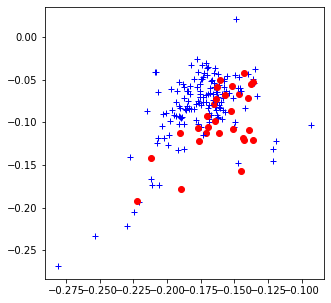

In [0]:
custom_plot(w2v_feature_array1, 'w2v(avg)_sci_clusters_s_d')
# custom_plot(w2v_feature_array2, 'w2v(avg)_sci_clusters_n_s_d')
#custom_plot(w2v_feature_array1, 'w2v(avg)_nltk_clusters_s_d')
#custom_plot(w2v_feature_array2, 'w2v(avg)_nltk_clusters_n_s_d')
##custom_plot(w2v_feature_array3, 'w2v(avg)_db_clusters_n_s_d')

In [0]:

#cols=['w2v(avg)_sci_clusters_s_d','w2v(avg)_nltk_clusters_s_d','w2v(avg)_db_clusters_s_d','w2v(avg)_sci_clusters_n_s_d','w2v(avg)_nltk_clusters_n_s_d','w2v(avg)_db_clusters_n_s_d','w2v(avg)_sci_clusters_perf','w2v(avg)_nltk_clusters_per','w2v(avg)_db_clusters_per']
cols=['w2v(avg)_sci_clusters_s_d', 'w2v(avg)_sci_clusters_n_s_d',\
       'w2v(avg)_sci_clusters_perf', 'w2v(avg)_nltk_clusters_s_d',\
       'w2v(avg)_nltk_clusters_n_s_d', 'w2v(avg)_nltk_clusters_per',\
       'w2v(avg)_mb_clusters_n_s_d_1', 'w2v(avg)_mb_clusters_n_s_d_2',\
       'w2v(avg)_mb_clusters_n_s_d_3', 'w2v_sci_clusters_s_d',\
       'w2v_sci_clusters_n_s_d', 'w2v_sci_clusters_perf',\
       'w2v_nltk_clusters_s_d', 'w2v_nltk_clusters_n_s_d',\
       'w2v_nltk_clusters_per', 'w2v_mb_clusters_n_s_d_1',\
       'w2v_mb_clusters_n_s_d_2', 'w2v_mb_clusters_n_s_d_3']
Type,Acc,Precision,Recall,f1 = metrics_dataframe(cols)
dataframe_new = pd.DataFrame(data={"Type":Type,"Accuracy":Acc,"Precision":Precision,"Recall":Recall,"F1":f1})

dataframe_new.to_csv('/content/drive/My Drive/Fraud detection in internal auditing/2019_w2v_w2v(avg)_clustering.csv')


